In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

In [22]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [4]:
file = 'tess2019306063752-s0018-0000000326815804-0162-s_lc.fits'
tbl = Table.read(file, format='fits')

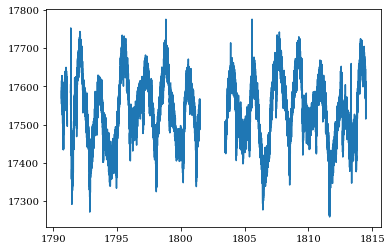

In [6]:
plt.plot(tbl['TIME'], tbl['PDCSAP_FLUX'])

In [17]:
df = tbl.to_pandas()
ok = np.isfinite(df['PDCSAP_FLUX'])

In [30]:
period_orig = 6.005 # previously published

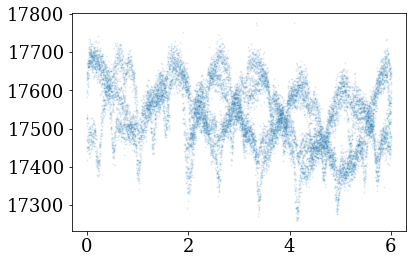

In [32]:
plt.scatter(df['TIME'].values[ok] % period_orig, df['PDCSAP_FLUX'].values[ok], alpha=0.1, s=1)

In [9]:
import exoplanet as xo

In [18]:
frequency, power = xo.estimators.LombScargle(df['TIME'].values[ok], df['PDCSAP_FLUX'].values[ok]).autopower()

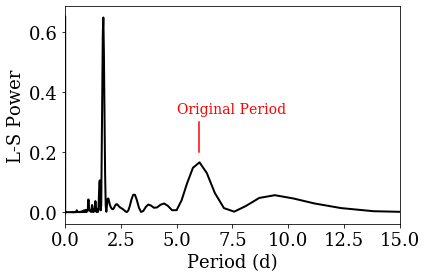

In [107]:
plt.plot(1./frequency, power, lw=2, c='k')

plt.xlim(0, 15)
plt.xlabel('Period (d)')
plt.ylabel('L-S Power')

plt.plot([period_orig, period_orig], [0.2,0.3], c='r')
plt.text(5, 0.33, 'Original Period', fontsize=14, color='r')
plt.savefig('LS.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [100]:
period_p = 0.521 * 2 # the exoplanet candidate period found, x2 b/c it's a binary (even/odd test)
print(period_p)

1.042


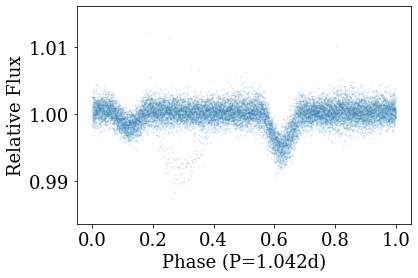

In [104]:
smo = df['PDCSAP_FLUX'][ok].rolling(350, center=True).median()

plt.scatter((df['TIME'].values[ok] % period_p) / period_p, 
            (df['PDCSAP_FLUX'].values[ok] - smo)/np.nanmedian(df['PDCSAP_FLUX'].values[ok]) + 1, alpha=0.1, s=1)
plt.ylabel('Relative Flux')
plt.xlabel('Phase (P=1.042d)')
plt.savefig('EB.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

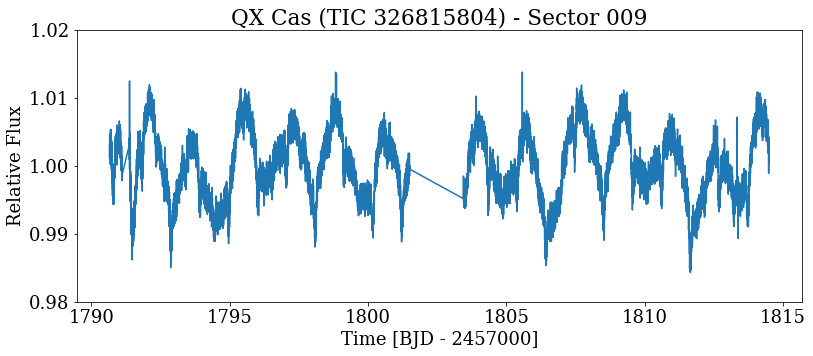

In [102]:
plt.figure(figsize=(13,5))

plt.plot(df['TIME'].values[ok], df['PDCSAP_FLUX'].values[ok] / np.nanmedian(df['PDCSAP_FLUX'].values[ok]))
plt.xlabel('Time [BJD - 2457000]')
plt.ylim(0.98, 1.02)
plt.ylabel('Relative Flux')

plt.title('QX Cas (TIC 326815804) - Sector 009')
plt.savefig('LC.png', dpi=150, bbox_inches='tight', pad_inches=0.25)